# Analyze Kitchen Countertop Quotes


## Set Options and Macros

In [4]:
* Convert column names to follow SAS naming conventions. *;
options validvarname=v7;


* Create a macro to preview table easily *;
%macro head(tbl, n=5);
   proc print data=&tbl(obs=&n) noobs;
   run;
%mend head;


11                                                         The SAS System                                11:25 Tuesday, May 30, 2023

72         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
72       ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
73         
74         * Convert column names to follow SAS naming conventions. *;
75         options validvarname=v7;
76         
77         
78         * Create a macro to preview table easily *;
79         %macro head(tbl, n=5);
80            proc print data=&tbl(obs=&n) noobs;
81            run;
82         %mend head;
83         
84         
85         ods html5 (id=saspy_internal) close;ods listing;
86         

12                                                         The SAS System                                11:25 Tuesday, May 30, 2023

87         


## Access Data

Use the path macro variable to point to the correct file location. Read the Excel file in with the LIBNAME statement.

In [5]:
%let rc = %sysfunc(filename(fr,.));
%let curdir = %sysfunc(pathname(&fr));
%let rc = %sysfunc(filename(fr));

%let loc=&curdir;

libname xl xlsx "&loc.\Kitchen Counter Quotes.xlsx";


13                                                         The SAS System                                11:25 Tuesday, May 30, 2023

90         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
90       ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
91         
92         %let rc = %sysfunc(filename(fr,.));
93         %let curdir = %sysfunc(pathname(&fr));
94         %let rc = %sysfunc(filename(fr));
95         
96         %let loc=&curdir;
97         
98         libname xl xlsx "&loc.\Kitchen Counter Quotes.xlsx";
NOTE: Libref XL was successfully assigned as follows: 
      Engine:        XLSX 
      Physical Name: C:\Users\pestyl\OneDrive - SAS\github repos\Data Projects\Kitchen Remodel Quotes\Kitchen Counter Quotes.xlsx
99         
100        
101        ods html5 (id=saspy_internal) close;ods listing;
102        

14                                                     

Confirm the data loaded correctly by viewing the variable of the table.

In [6]:
* Only view the column info *;
ods select Variables;

proc contents data=xl._all_;
run;

## Explore Data

View the entire table using head macro.

In [7]:
%head(xl.sheet1, n=max)

Company,Level,Material,Price,Includes_Backsplash,Includes_Sink
Mogastone,1,Granite,2850.00,Yes,Yes
Mogastone,2,Granite/Quartz,3190.00,Yes,Yes
Mogastone,3,Granite/Quartz/Marble,3790.00,Yes,Yes
Mogastone,4,Granite/Quartz/Marble,4250.00,Yes,Yes
Mogastone,5,Granite/Quartz/Marble/Quartize,4700.00,Yes,Yes
Mogastone,6,Granite/Quartz/Marble/Quartize,5390.00,Yes,Yes
Carolina Custom Kitchen & Bath,1,Quartz,2799.23,No,Yes
Absolute Stone,1,Granite,1915.49,No,No
Absolute Stone,2,Granite,2115.00,No,No
Absolute Stone,3,Granite/Marble,2305.00,No,No


Confirm the distinct values in the following columns:
- Company **(5 distinct values)**
- Level **(level 1 through level 6, 999 is unknown)**
- Includes_Backsplash **(Yes/No)**
- Includes_Sink **(Yes/No)**


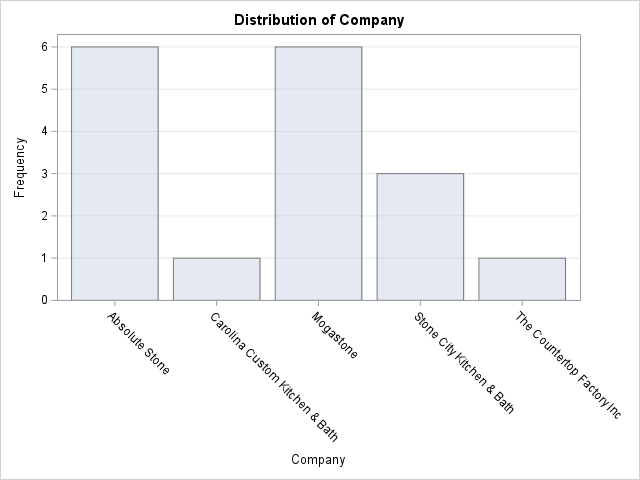
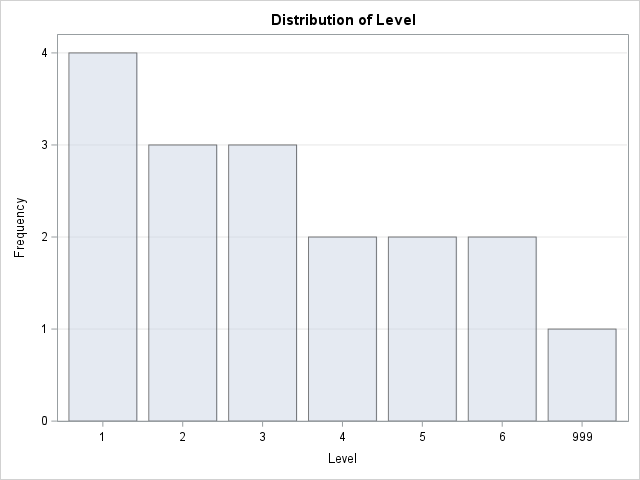
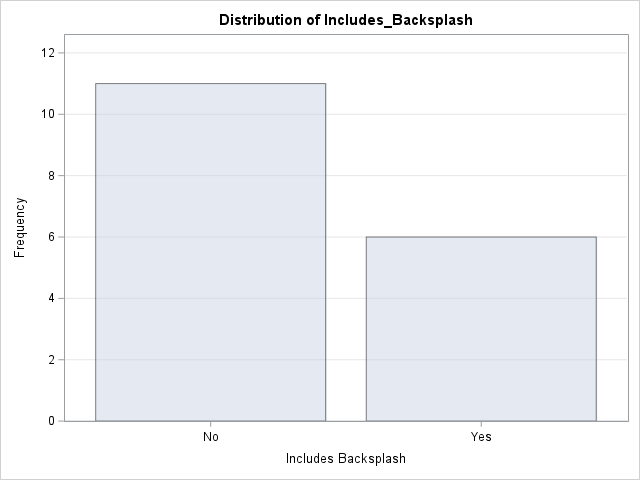
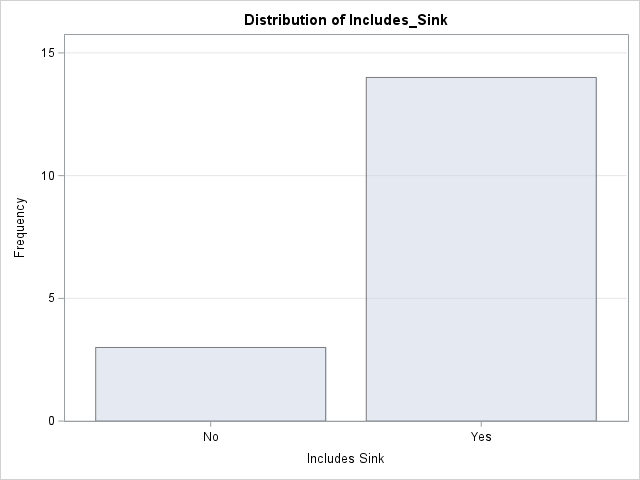

In [8]:
proc freq data=xl.sheet1;
    tables Company Level Includes_Backsplash Includes_Sink / plots=freqplot;
run;

### Summary: 
#### Many of the quoted prices include a backsplash and do not include a sink. Must add a new column with adjusted estimated prices for those values. Need to remove backsplash price, add sink price.

## Prepare Data

Preview the data.

In [9]:
%head(xl.sheet1)

Company,Level,Material,Price,Includes_Backsplash,Includes_Sink
Mogastone,1,Granite,2850.00,Yes,Yes
Mogastone,2,Granite/Quartz,3190.00,Yes,Yes
Mogastone,3,Granite/Quartz/Marble,3790.00,Yes,Yes
Mogastone,4,Granite/Quartz/Marble,4250.00,Yes,Yes
Mogastone,5,Granite/Quartz/Marble/Quartize,4700.00,Yes,Yes


### Create the Quotes table

#### Tasks

1. Add a **estimated price (Est_Price)** column.
- If backsplash is included, subtract **\$300** to the quote (using an estimated assumption).
- If sink is not included, add **$300** to the quote (using an estimated assumption).

2. Format the **Price** and **Est_Price** columns using a dollar format.

3. Remove rows without an option of **Quartz**.

4. Create a key column named **QuoteName** with the company name and level.

5. Create a **Budget** column to determine if it's *over budget* or *under budget*.

6. Create a **Plus_Minus** column to determine the amount over/under budget.

In [10]:
%let minusBacksplash=-250;
%let addSink=300;
%let projectBudget=4000;

data quotes;
    length QuoteName $40;
    set xl.sheet1;
* remove all quotes that do not have Quartz *;
    where Material contains "Quartz";
    QuoteName=cat(strip(Company)," - ","Level", " ",Level);
* Create the Est_Price column for quotes without Sink and/or Backsplash *;
    if Includes_Backsplash = "Yes" then Add=&MinusBacksplash;
        else Est_Price=Price;
    if Includes_Sink = "No" then Add=sum(Add,&addSink);
    Est_Price=sum(Price, Add);
    Plus_Minus=Est_Price-&projectBudget;
    length Budget $40;
    if Plus_Minus > 0 then Budget="Over Budget";
        else Budget="Under Budget";
* format, label and drop columns *;
    format Price Est_Price Plus_Minus dollar14.2;
    drop Material;
    label 
      Est_Price="Estimated Price"
      Level="Level of Material";
run;

%head(quotes, n=max)

QuoteName,Company,Level,Price,Includes_Backsplash,Includes_Sink,Add,Est_Price,Plus_Minus,Budget
Mogastone - Level 2,Mogastone,2,"$3,190.00",Yes,Yes,-250,"$2,940.00","$-1,060.00",Under Budget
Mogastone - Level 3,Mogastone,3,"$3,790.00",Yes,Yes,-250,"$3,540.00",$-460.00,Under Budget
Mogastone - Level 4,Mogastone,4,"$4,250.00",Yes,Yes,-250,"$4,000.00",$0.00,Under Budget
Mogastone - Level 5,Mogastone,5,"$4,700.00",Yes,Yes,-250,"$4,450.00",$450.00,Over Budget
Mogastone - Level 6,Mogastone,6,"$5,390.00",Yes,Yes,-250,"$5,140.00","$1,140.00",Over Budget
Carolina Custom Kitchen & Bath - Level 1,Carolina Custom Kitchen & Bath,1,"$2,799.23",No,Yes,.,"$2,799.23","$-1,200.77",Under Budget
Absolute Stone - Level 4,Absolute Stone,4,"$3,358.62",No,Yes,.,"$3,358.62",$-641.38,Under Budget
Absolute Stone - Level 5,Absolute Stone,5,"$3,843.97",No,Yes,.,"$3,843.97",$-156.03,Under Budget
Absolute Stone - Level 6,Absolute Stone,6,"$4,188.60",No,Yes,.,"$4,188.60",$188.60,Over Budget
Stone City Kitchen & Bath - Level 1,Stone City Kitchen & Bath,1,"$3,240.02",No,Yes,.,"$3,240.02",$-759.98,Under Budget


### Create the Google reviews table and join with Quotes

Create a table with the google reviews of each company.

In [11]:
data companyRatings;
    infile datalines dsd missover;
    input Company:$40. Rating:8. TotalReviews:8.;
    datalines;
Mogastone,4.8, 44
Carolina Custom Kitchen & Bath,4.1, 8
Absolute Stone,3.9, 45
Stone City Kitchen & Bath,5, 60
The Countertop Factory Inc, 4.8, 25
;
run;

%head(companyRatings)

Company,Rating,TotalReviews
Mogastone,4.8,44
Carolina Custom Kitchen & Bath,4.1,8
Absolute Stone,3.9,45
Stone City Kitchen & Bath,5.0,60
The Countertop Factory Inc,4.8,25


Join with with the quotes table to add the ratings and total reviews to each company.

In [12]:
proc sql;
    create table quotes_clean as
    select q.*,
           r.Rating, r.TotalReviews
        from quotes as q left join companyRatings as r
        on q.Company=r.Company;
quit;

%head(quotes_clean, n=10)

QuoteName,Company,Level,Price,Includes_Backsplash,Includes_Sink,Add,Est_Price,Plus_Minus,Budget,Rating,TotalReviews
Absolute Stone - Level 4,Absolute Stone,4,"$3,358.62",No,Yes,.,"$3,358.62",$-641.38,Under Budget,3.9,45
Absolute Stone - Level 6,Absolute Stone,6,"$4,188.60",No,Yes,.,"$4,188.60",$188.60,Over Budget,3.9,45
Absolute Stone - Level 5,Absolute Stone,5,"$3,843.97",No,Yes,.,"$3,843.97",$-156.03,Under Budget,3.9,45
Carolina Custom Kitchen & Bath - Level 1,Carolina Custom Kitchen & Bath,1,"$2,799.23",No,Yes,.,"$2,799.23","$-1,200.77",Under Budget,4.1,8
Mogastone - Level 3,Mogastone,3,"$3,790.00",Yes,Yes,-250,"$3,540.00",$-460.00,Under Budget,4.8,44
Mogastone - Level 4,Mogastone,4,"$4,250.00",Yes,Yes,-250,"$4,000.00",$0.00,Under Budget,4.8,44
Mogastone - Level 6,Mogastone,6,"$5,390.00",Yes,Yes,-250,"$5,140.00","$1,140.00",Over Budget,4.8,44
Mogastone - Level 2,Mogastone,2,"$3,190.00",Yes,Yes,-250,"$2,940.00","$-1,060.00",Under Budget,4.8,44
Mogastone - Level 5,Mogastone,5,"$4,700.00",Yes,Yes,-250,"$4,450.00",$450.00,Over Budget,4.8,44
Stone City Kitchen & Bath - Level 3,Stone City Kitchen & Bath,3,"$4,355.42",No,Yes,.,"$4,355.42",$355.42,Over Budget,5.0,60


# Analyze Prices

### Set Up Macro Variables for Visualization

In [13]:
* Set up formatting variables *;
%let textColor=cx768396;
%let AxisLabel=16;
%let AxisValue=10;
%let titleStyle=color=&textColor justify=left;


29                                                         The SAS System                                11:25 Tuesday, May 30, 2023

229        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
229      ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
230        
231        * Set up formatting variables *;
232        %let textColor=cx768396;
233        %let AxisLabel=16;
234        %let AxisValue=10;
235        %let titleStyle=color=&textColor justify=left;
236        
237        
238        ods html5 (id=saspy_internal) close;ods listing;
239        

30                                                         The SAS System                                11:25 Tuesday, May 30, 2023

240        


### a. Total Price by Company and Level


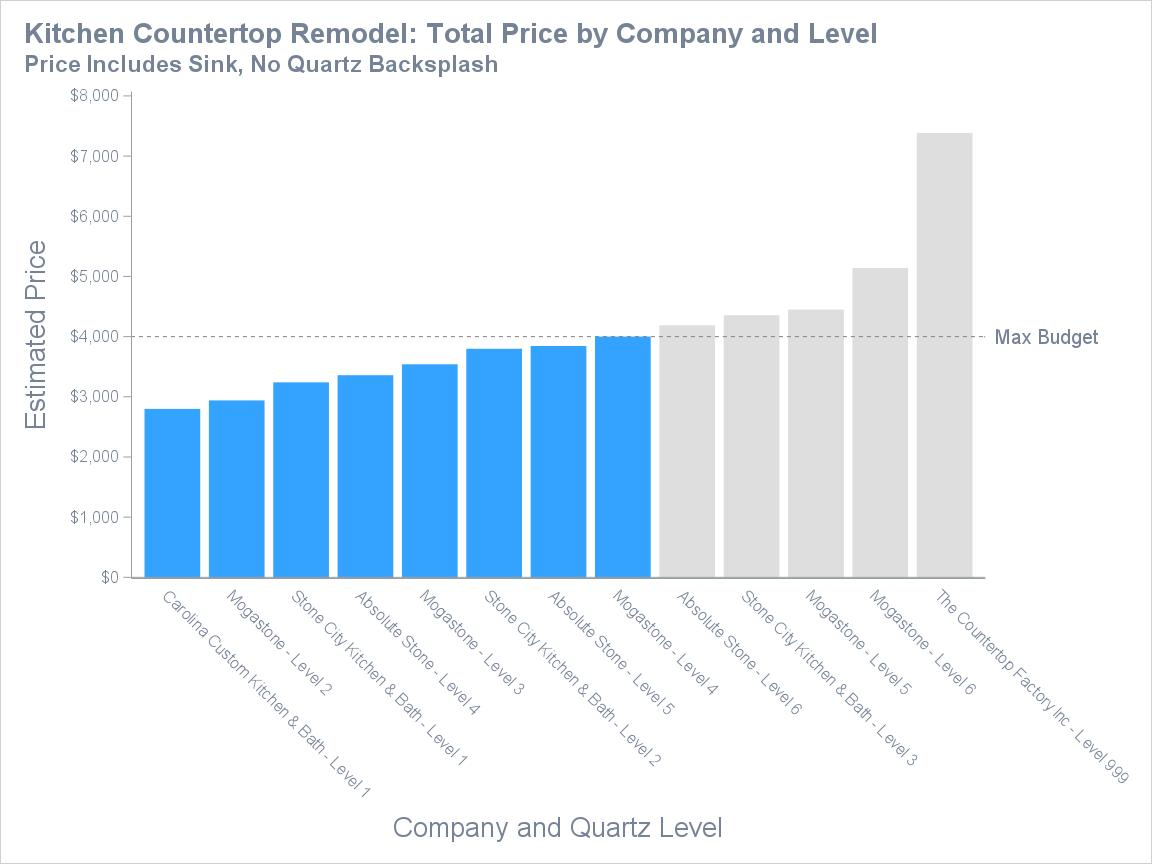

In [14]:
* Set up output options *;
ods listing gpath="&loc/images";
ods graphics /  width=12in imagename="kitchen_remodel_quotes" imagefmt=jpeg;

* Add titles *;
title1 &titleStyle height=16pt "Kitchen Countertop Remodel: Total Price by Company and Level";
title2 &titleStyle height=14pt "Price Includes Sink, No Quartz Backsplash";

* Vertical bar chart *;
proc sgplot data=quotes_clean noautolegend noborder;
    vbar QuoteName /
        response=Est_Price
        categoryOrder=respasc
        group=Budget
        nooutline datalabel=Rating
;

* Add budget reference line *;
    refline 4000 / 
          label="Max Budget"
          labelattrs=(color=&textColor size=12pt)
          lineattrs=(color=gray pattern=ShortDash)
 ;
 
 * Modify the colors for over/under budget *;
    styleattrs datacolors=(cx33a3ff cxdedede);
    
* Adjust x and y axis *;
    xaxis label="Company and Quartz Level"
          fitpolicy=rotate
          labelattrs=(size=&AxisLabel color=&textColor)
          valueattrs=(size=&AxisValue color=&textColor)
          display=(noticks)
;
    yaxis label="Estimated Price"
          labelattrs=(size=&AxisLabel color=&textColor)
          valueattrs=(size=&AxisValue color=&textColor)
          values=(0 to 8000 by 1000);
;
run;

title;

ods _all_ close;